,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,3.0,4.363636,4.000000,4.057692,3.750000,4.300000,4.666667,4.220000,4.333333,4.260000,...,4.062500,4.285714,0.0,0.000000,4.300000,3.000000,4.000000,4.000000,4.224138,3.937500
1,6.0,4.500000,1.000000,3.666667,5.000000,3.000000,0.000000,3.750000,0.000000,3.500000,...,3.888889,3.500000,0.0,0.000000,3.500000,0.000000,3.666667,0.000000,4.333333,0.000000
2,8.0,4.666667,3.600000,3.640000,3.714286,3.428571,4.800000,3.736842,5.000000,3.923077,...,3.952381,3.692308,0.0,3.666667,3.285714,0.000000,3.181818,0.000000,4.192308,4.333333
3,10.0,3.000000,4.000000,4.000000,4.000000,4.000000,3.818182,3.909091,3.000000,3.500000,...,3.900000,4.250000,0.0,0.000000,4.000000,0.000000,3.833333,0.000000,3.840000,4.500000
4,11.0,4.083333,3.900000,3.748276,4.090909,3.887324,3.892857,4.085890,3.500000,3.923977,...,4.093220,3.482759,0.0,4.574074,4.059524,4.750000,4.037118,4.142857,4.020134,3.814103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,22352.0,3.366279,3.631313,3.362840,3.676471,3.766667,3.724490,3.509479,3.558824,3.496324,...,3.456233,3.532895,0.0,3.776316,3.465517,2.875000,3.528302,3.636364,3.480826,3.644444
8037,22354.0,4.076923,4.333333,3.944444,4.500000,4.714286,4.684211,3.900000,4.500000,4.220588,...,4.018182,4.185185,0.0,0.000000,4.333333,4.454545,3.958333,4.375000,4.246667,4.055556
8038,22357.0,3.492537,3.776596,3.671587,3.780000,3.685185,3.703704,3.298507,2.818182,3.412281,...,3.610778,3.760714,0.0,4.500000,3.744898,4.033333,3.284091,3.710526,3.723553,3.390909
8039,22363.0,2.023810,1.265625,1.687097,1.526786,1.213675,2.272727,1.666667,1.500000,1.898936,...,1.701681,2.068627,0.0,1.944444,1.396104,3.500000,1.768116,1.000000,1.925325,1.720588


[4 4 4 ... 7 7 7]
0
19
8041


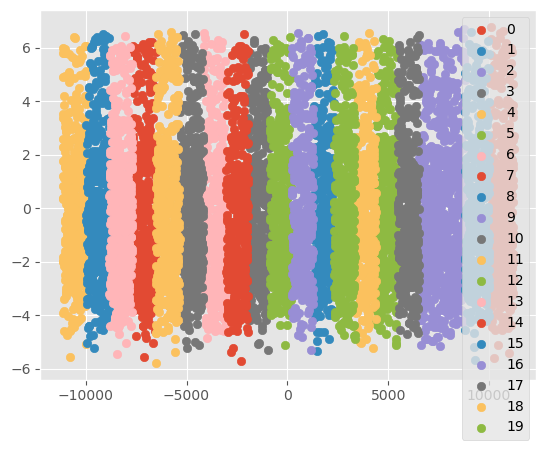

In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from IPython.display import display

style.use("ggplot")
%matplotlib inline

#Load Data
data_folder = "C:/Users/roman/OneDrive/Bureau/UM/BA/Y3/P1/RS/Group Assignment/archive"
average_ratings_per_user_for_each_genre_df = pd.read_csv(data_folder + "/data.csv")
data_df = average_ratings_per_user_for_each_genre_df.fillna(0)
data_df = data_df.drop(8041)
display(data_df)


n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters).fit(data_df)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(labels)
print(labels.min())
print(labels.max())
print(len(labels))

#PLOT
#data = load_digits().data_df
pca = PCA(2) #change?
df = pca.fit_transform(data_df)

u_labels = np.unique(labels)

#plotting the results:
for i in u_labels:
    plt.scatter(df[labels == i , 0] , df[labels == i , 1] , label = i)
plt.legend()
plt.show()

In [3]:
data_df['labels'] = labels

print(data_df)

            0         1         2         3         4         5         6  \
0         3.0  4.363636  4.000000  4.057692  3.750000  4.300000  4.666667   
1         6.0  4.500000  1.000000  3.666667  5.000000  3.000000  0.000000   
2         8.0  4.666667  3.600000  3.640000  3.714286  3.428571  4.800000   
3        10.0  3.000000  4.000000  4.000000  4.000000  4.000000  3.818182   
4        11.0  4.083333  3.900000  3.748276  4.090909  3.887324  3.892857   
...       ...       ...       ...       ...       ...       ...       ...   
8036  22352.0  3.366279  3.631313  3.362840  3.676471  3.766667  3.724490   
8037  22354.0  4.076923  4.333333  3.944444  4.500000  4.714286  4.684211   
8038  22357.0  3.492537  3.776596  3.671587  3.780000  3.685185  3.703704   
8039  22363.0  2.023810  1.265625  1.687097  1.526786  1.213675  2.272727   
8040  22364.0  3.000000  3.333333  3.071429  3.250000  3.000000  3.000000   

             7         8         9  ...        12   13        14        15 